## Load using package

In [54]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)

## Load image

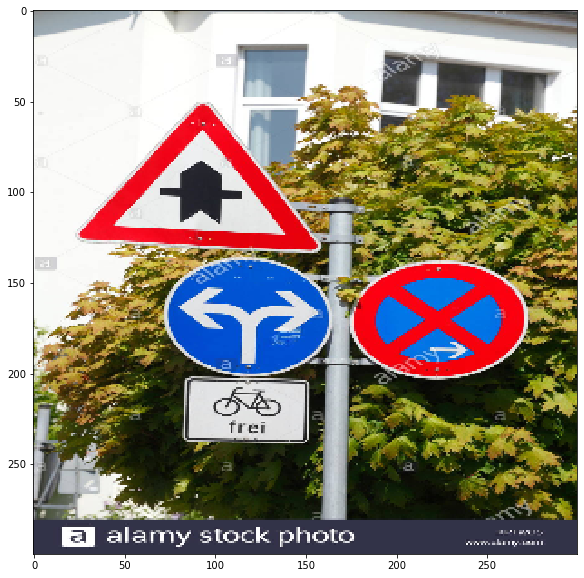

In [84]:
images = glob.glob('../data/*jpg')

img = cv2.imread(images[0])
img = cv2.resize(img, (300, 300))
res = img.copy()
origin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(origin)
plt.show()

## Tuning HSV value to threshold image

In [86]:
import cv2 as cv
import argparse
max_value = 255
max_value_H = 360//2
low_H = 0
low_S = 0
low_V = 0
high_H = max_value_H
high_S = max_value
high_V = max_value
window_capture_name = 'Video Capture'
window_detection_name = 'Object Detection'
low_H_name = 'Low H'
low_S_name = 'Low S'
low_V_name = 'Low V'
high_H_name = 'High H'
high_S_name = 'High S'
high_V_name = 'High V'
def on_low_H_thresh_trackbar(val):
    global low_H
    global high_H
    low_H = val
    low_H = min(high_H-1, low_H)
    cv.setTrackbarPos(low_H_name, window_detection_name, low_H)
def on_high_H_thresh_trackbar(val):
    global low_H
    global high_H
    high_H = val
    high_H = max(high_H, low_H+1)
    cv.setTrackbarPos(high_H_name, window_detection_name, high_H)
def on_low_S_thresh_trackbar(val):
    global low_S
    global high_S
    low_S = val
    low_S = min(high_S-1, low_S)
    cv.setTrackbarPos(low_S_name, window_detection_name, low_S)
def on_high_S_thresh_trackbar(val):
    global low_S
    global high_S
    high_S = val
    high_S = max(high_S, low_S+1)
    cv.setTrackbarPos(high_S_name, window_detection_name, high_S)
def on_low_V_thresh_trackbar(val):
    global low_V
    global high_V
    low_V = val
    low_V = min(high_V-1, low_V)
    cv.setTrackbarPos(low_V_name, window_detection_name, low_V)
def on_high_V_thresh_trackbar(val):
    global low_V
    global high_V
    high_V = val
    high_V = max(high_V, low_V+1)
    cv.setTrackbarPos(high_V_name, window_detection_name, high_V)

# cap = cv.VideoCapture(args.camera)
cv.namedWindow(window_capture_name)
cv.namedWindow(window_detection_name)
cv.createTrackbar(low_H_name, window_detection_name , low_H, max_value_H, on_low_H_thresh_trackbar)
cv.createTrackbar(high_H_name, window_detection_name , high_H, max_value_H, on_high_H_thresh_trackbar)
cv.createTrackbar(low_S_name, window_detection_name , low_S, max_value, on_low_S_thresh_trackbar)
cv.createTrackbar(high_S_name, window_detection_name , high_S, max_value, on_high_S_thresh_trackbar)
cv.createTrackbar(low_V_name, window_detection_name , low_V, max_value, on_low_V_thresh_trackbar)
cv.createTrackbar(high_V_name, window_detection_name , high_V, max_value, on_high_V_thresh_trackbar)
while True:
    
    frame = img
    frame_HSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    frame_threshold = cv.inRange(frame_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    
    cv.imshow(window_capture_name, frame)
    cv.imshow(window_detection_name, frame_threshold)
    
    key = cv.waitKey(30)
    if key == ord('q') or key == 27:
        cv.destroyAllWindows()
        print("low_H: ", low_H)
        print("low_S: ", low_S)
        print("low_V: ", low_V)
        print("high_H: ", high_H)
        print("high_S: ", high_S)
        print("high_V: ", high_V)
#         print((low_H, low_S, low_V, high_H, high_S, high_V))
        break

low_H:  54
low_S:  105
low_V:  86
high_H:  180
high_S:  255
high_V:  255


## Threshoding image to a mask

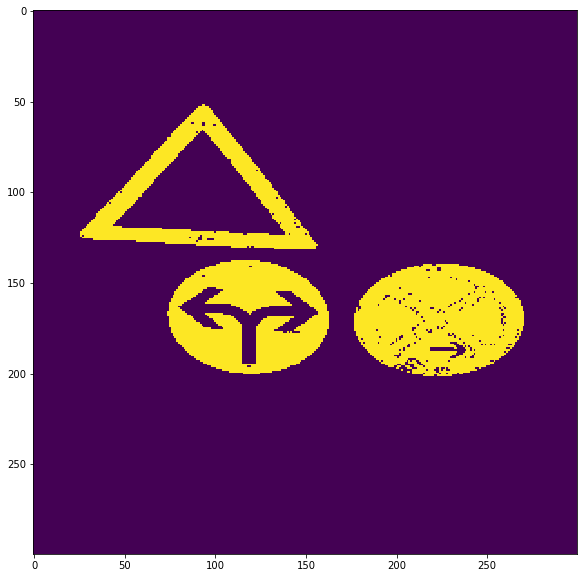

In [90]:
images = glob.glob('../data/*jpg')

img = cv2.imread(images[0])
img = cv2.resize(img, (300, 300))
res = img.copy()

gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

lower_red = np.array([169, 191, 0])
upper_red = np.array([180, 255, 255])

lower_blue = np.array([96, 105, 84])
upper_blue = np.array([160, 255, 255])

hsv = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red = cv2.inRange(hsv, lower_red, upper_red)

mask = cv2.bitwise_or(mask_blue, mask_red)

plt.imshow(mask)
plt.show()

## Find contours and get bounding box

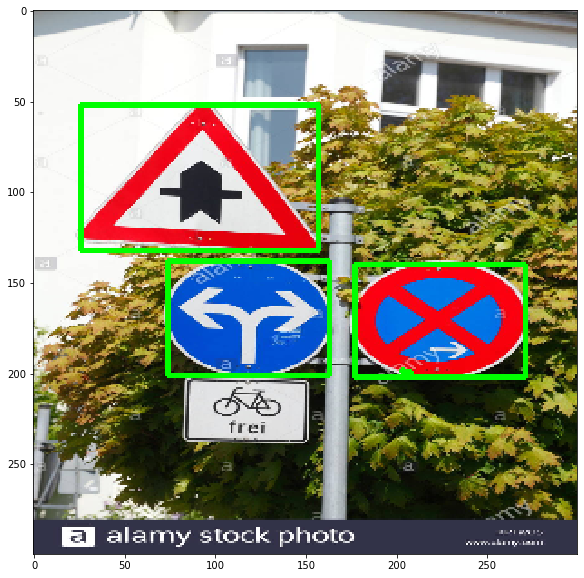

In [91]:
conts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = []
for i in range(0, len(conts)):
    (x, y, w, h) = cv2.boundingRect(conts[i])
    rects.append((x, y, w, h))
    cv2.rectangle(res, (x, y), (x + w, y + h), [0, 255, 0], 2)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)
plt.show()